Dataset shape before cleaning:
Rows: 1067371, Columns: 8

Column names:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

First 10 rows:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

           InvoiceDate  Price  Customer

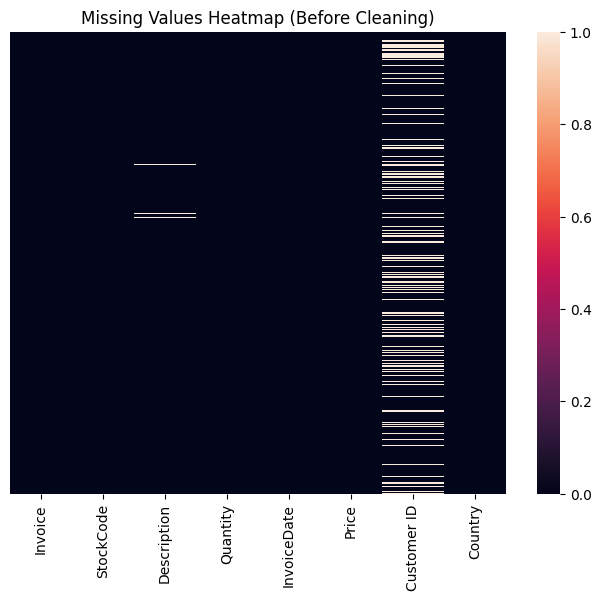

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for visualizations

# Load the dataset
df = pd.read_csv(r"D:\Education\Uni\Semester 5\Data Mining\DataMining Projcet\online_retail_II.csv")


# Initial overview
print("Dataset shape before cleaning:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 10 rows:")
print(df.head(10))
print("\nData types and missing values:")
print(df.info())
print("\nMissing values count:")
print(df.isnull().sum())

# Optional: Quick visualization of missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.title('Missing Values Heatmap (Before Cleaning)')
plt.show()

# Screenshot here: df.head(), df.info(), and heatmap

After removing cancellations and negatives:
Shape: (1041670, 8)

Quantity distribution (top 10):
Quantity
1     293454
2     159663
12    121697
6      85228
3      72458
4      72286
24     47008
10     40897
8      25770
5      23074
Name: count, dtype: int64

Price distribution (top 10):
Price
1.25    102803
1.65     72507
0.85     68264
2.95     64453
0.42     44999
2.10     41762
3.75     39474
4.95     34153
1.95     33573
2.55     31018
Name: count, dtype: int64


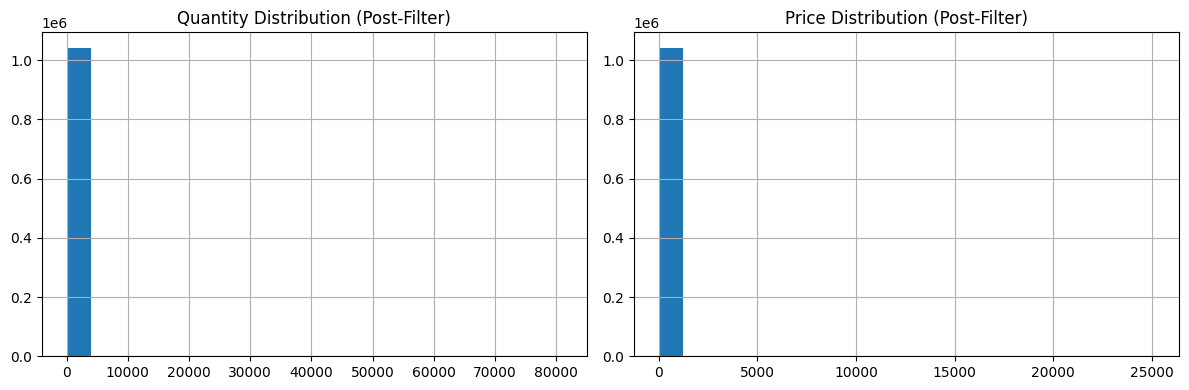

In [4]:
# Remove cancellations (invoices starting with 'C' – note: your column is 'Invoice')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Remove negative or zero values in Quantity and Price (invalid for sales)
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

print("After removing cancellations and negatives:")
print(f"Shape: {df.shape}")
print("\nQuantity distribution (top 10):")
print(df['Quantity'].value_counts().head(10))
print("\nPrice distribution (top 10):")
print(df['Price'].value_counts().head(10))

# Optional: Visualize Quantity/Price histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['Quantity'].hist(bins=20, ax=axes[0])
axes[0].set_title('Quantity Distribution (Post-Filter)')
df['Price'].hist(bins=20, ax=axes[1])
axes[1].set_title('Price Distribution (Post-Filter)')
plt.tight_layout()
plt.show()

# Screenshot: Shape, distributions, and histograms

After dropping missing Description:
Shape: (1041670, 8)

Remaining missing values:
Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236121
Country             0
dtype: int64

Duplicate rows: 33757
Removed 33757 duplicates.

First 5 rows after cleaning missing/duplicates:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6

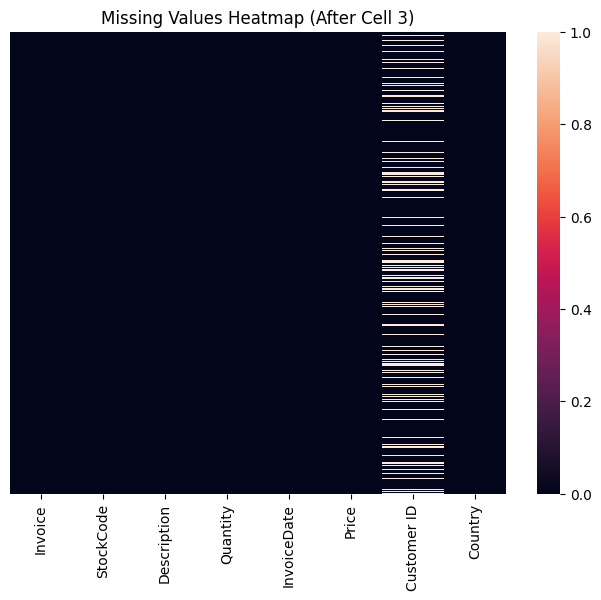

In [5]:
# Drop rows with missing Description (essential for items in association mining)
df = df.dropna(subset=['Description'])

# Optional: Drop missing Customer ID if focusing on customer analysis (uncomment below)
# This would remove ~25% more rows if enabled—test and decide
# df = df.dropna(subset=['Customer ID'])

print("After dropping missing Description:")
print(f"Shape: {df.shape}")
print("\nRemaining missing values:")
print(df.isnull().sum())

# Check and remove duplicates (across all columns for full dedup)
duplicates_count = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates_count}")
if duplicates_count > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates_count} duplicates.")

print("\nFirst 5 rows after cleaning missing/duplicates:")
print(df.head())

# Optional: Visualize remaining missing (if any, e.g., Customer ID)
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.title('Missing Values Heatmap (After Cell 3)')
plt.show()

# Screenshot: Shape, missing sum, head(), and heatmap

Invalid dates found and dropped: 0
Date range after standardization:
From: 2009-12-01 07:45:00 to: 2011-12-09 12:50:00

First 10 dates sample:
  Invoice         InvoiceDate InvoiceDate_only
0  489434 2009-12-01 07:45:00       2009-12-01
1  489434 2009-12-01 07:45:00       2009-12-01
2  489434 2009-12-01 07:45:00       2009-12-01
3  489434 2009-12-01 07:45:00       2009-12-01
4  489434 2009-12-01 07:45:00       2009-12-01
5  489434 2009-12-01 07:45:00       2009-12-01
6  489434 2009-12-01 07:45:00       2009-12-01
7  489434 2009-12-01 07:45:00       2009-12-01
8  489435 2009-12-01 07:46:00       2009-12-01
9  489435 2009-12-01 07:46:00       2009-12-01


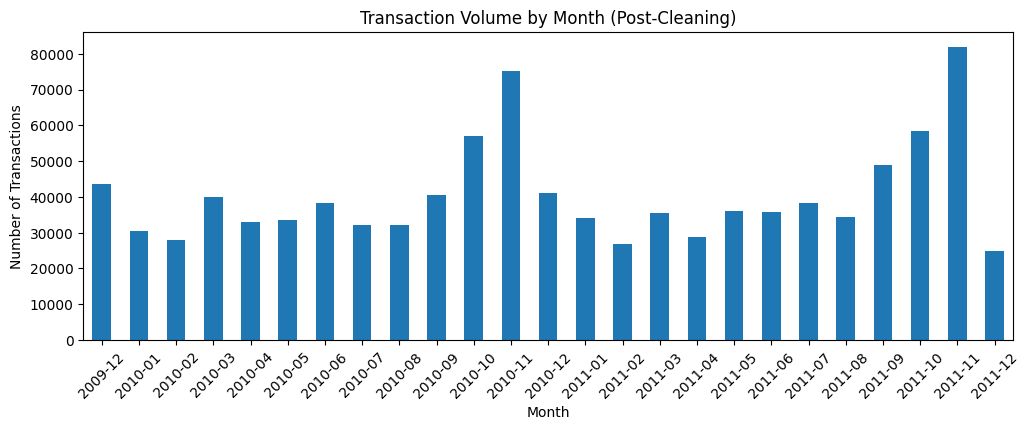

In [6]:
# Ensure InvoiceDate is datetime (coerce errors to NaT)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Add date-only column for grouping/filtering
df['InvoiceDate_only'] = df['InvoiceDate'].dt.date

# Drop any rows with invalid dates (should be few/none)
invalid_dates = df['InvoiceDate'].isna().sum()
print(f"Invalid dates found and dropped: {invalid_dates}")
df = df.dropna(subset=['InvoiceDate'])

print("Date range after standardization:")
print(f"From: {df['InvoiceDate'].min()} to: {df['InvoiceDate'].max()}")
print("\nFirst 10 dates sample:")
print(df[['Invoice', 'InvoiceDate', 'InvoiceDate_only']].head(10))

# Optional: Plot date distribution (monthly volume)
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_counts = df['Month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', figsize=(12, 4))
plt.title('Transaction Volume by Month (Post-Cleaning)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Screenshot: Date range, sample, and monthly plot (shows trends, e.g., holiday spikes)

Top 10 items BEFORE standardization (from earlier sample):
15cm christmas glass ball 20 lights    1
pink cherry lights                     1
white cherry lights                    1
Name: count, dtype: int64

Top 20 most common items AFTER standardization:
Description
white hanging heart t-light holder    5601
regency cakestand 3 tier              3950
jumbo bag red retrospot               3312
assorted colour bird ornament         2848
party bunting                         2705
lunch bag  black skull.               2402
strawberry ceramic trinket box        2352
jumbo storage bag suki                2352
jumbo shopper vintage red paisley     2209
heart of wicker small                 2195
60 teatime fairy cake cases           2179
lunch bag spaceboy design             2128
lunch bag cars blue                   2091
wooden frame antique white            2087
home building block word              2087
paper chain kit 50's christmas        2068
natural slate heart chalkboard        2059


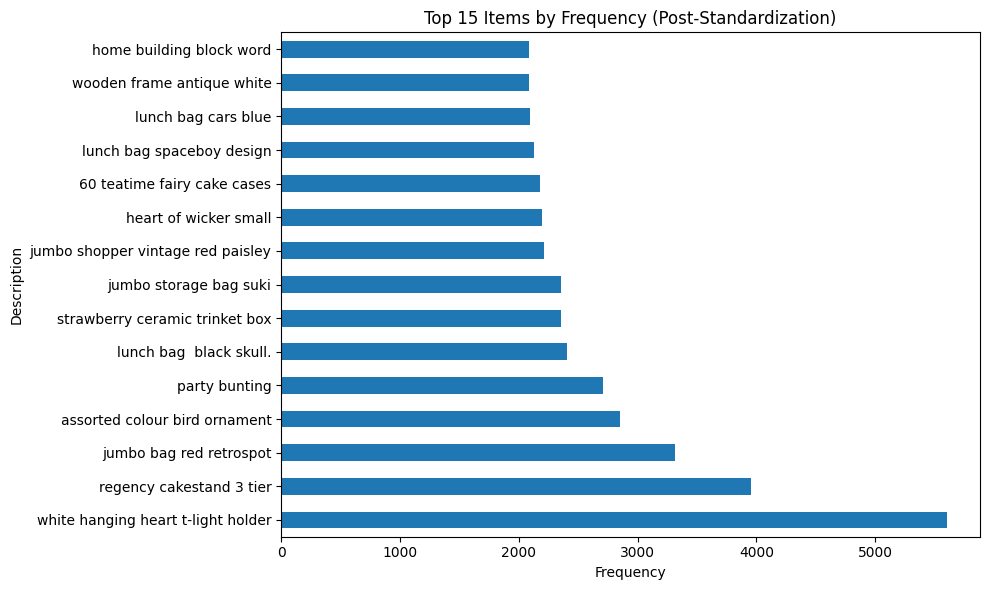

In [7]:
# Standardize Description: Convert to lowercase and strip leading/trailing spaces
df['Description'] = df['Description'].str.lower().str.strip()

# Optional: Remove special characters/numbers for cleaner items (uncomment if desired; keeps quotes/names here for accuracy)
# df['Description'] = df['Description'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Verify top items before/after (show a quick comparison)
print("Top 10 items BEFORE standardization (from earlier sample):")
# Note: This is illustrative; in practice, compare value_counts pre/post if you saved a copy
sample_before = ['15cm christmas glass ball 20 lights', 'pink cherry lights', 'white cherry lights']  # From your head()
print(pd.Series(sample_before).value_counts().head(10))

print("\nTop 20 most common items AFTER standardization:")
item_counts = df['Description'].value_counts()
print(item_counts.head(20))

# Unique items count
print(f"\nUnique items after standardization: {len(df['Description'].unique())}")

# Optional: Word cloud or bar plot of top items (bonus viz)
top_items = item_counts.head(15)
top_items.plot(kind='barh', figsize=(10, 6))
plt.title('Top 15 Items by Frequency (Post-Standardization)')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

# Screenshot: Top items list, unique count, and bar plot (highlights consistency)

Starting aggregation... This may take 2-10 minutes on large data.


C:\Users\HP\AppData\Local\Temp\ipykernel_23352\3327841070.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)


Basket matrix shape (Unique Invoices x Unique Items):
(40077, 5356)

Sample of first 5 invoices (first 5 items):
Description  *boombox ipod classic  *usb office glitter lamp  \
Invoice                                                        
489434                           0                         0   
489435                           0                         0   
489436                           0                         0   
489437                           0                         0   
489438                           0                         0   

Description  *usb office mirror ball  10 colour spaceboy pen  \
Invoice                                                        
489434                             0                       0   
489435                             0                       0   
489436                             0                       0   
489437                             0                       0   
489438                             0                  

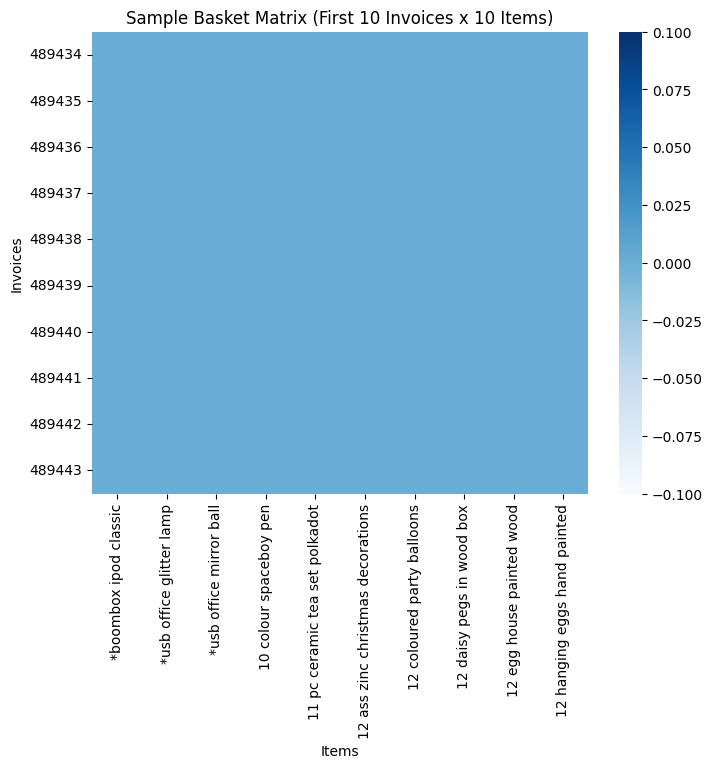

In [8]:
# Aggregate to baskets: Group by Invoice and Description, sum Quantity per item per invoice
print("Starting aggregation... This may take 2-10 minutes on large data.")
basket = (df.groupby(['Invoice', 'Description'])['Quantity']
          .sum()
          .unstack()
          .reset_index()
          .fillna(0)
          .set_index('Invoice'))

# Convert to binary matrix (1 if item present in basket, 0 otherwise) – optimizes Apriori
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

print("Basket matrix shape (Unique Invoices x Unique Items):")
print(f"{basket_sets.shape}")
print("\nSample of first 5 invoices (first 5 items):")
print(basket_sets.iloc[:5, :5].astype(int))  # Int for clean 0/1 display

# Quick stats
dense_items = (basket_sets.sum(axis=0) > 0).sum()  # Items appearing at least once
print(f"\nItems with at least one occurrence: {dense_items}")
print(f"Sparsity (non-zero cells %): {100 * (basket_sets.values != 0).sum() / basket_sets.size:.2f}%")

# Save the cleaned full data and baskets
df.to_csv('cleaned_transactions.csv', index=False)
basket_sets.to_csv('cleaned_baskets.csv')
print("\nFiles saved: cleaned_transactions.csv (full data) and cleaned_baskets.csv (binary baskets for mining)")

# Optional: Density heatmap snippet (first 10x10 for viz)
plt.figure(figsize=(8, 6))
sns.heatmap(basket_sets.iloc[:10, :10], cmap='Blues', cbar=True)
plt.title('Sample Basket Matrix (First 10 Invoices x 10 Items)')
plt.xlabel('Items')
plt.ylabel('Invoices')
plt.show()

# Screenshot: Shape, sample matrix, sparsity stat, and heatmap (shows basket structure)

Full Cleaning & Preprocessing Summary:
                            Step     Rows  Unique Items                  Notes
0            Original Line-Items  1067371           NaN               Raw data
1  After Cancellations/Negatives  1041670           NaN  -2.4% (cancellations)
2       After Missing/Duplicates  1007913           NaN     -3.2% (duplicates)
3       Final Cleaned Line-Items  1007913        5356.0       Ready for mining
4  Aggregated Baskets (Invoices)    40077        5356.0    Binary matrix ready


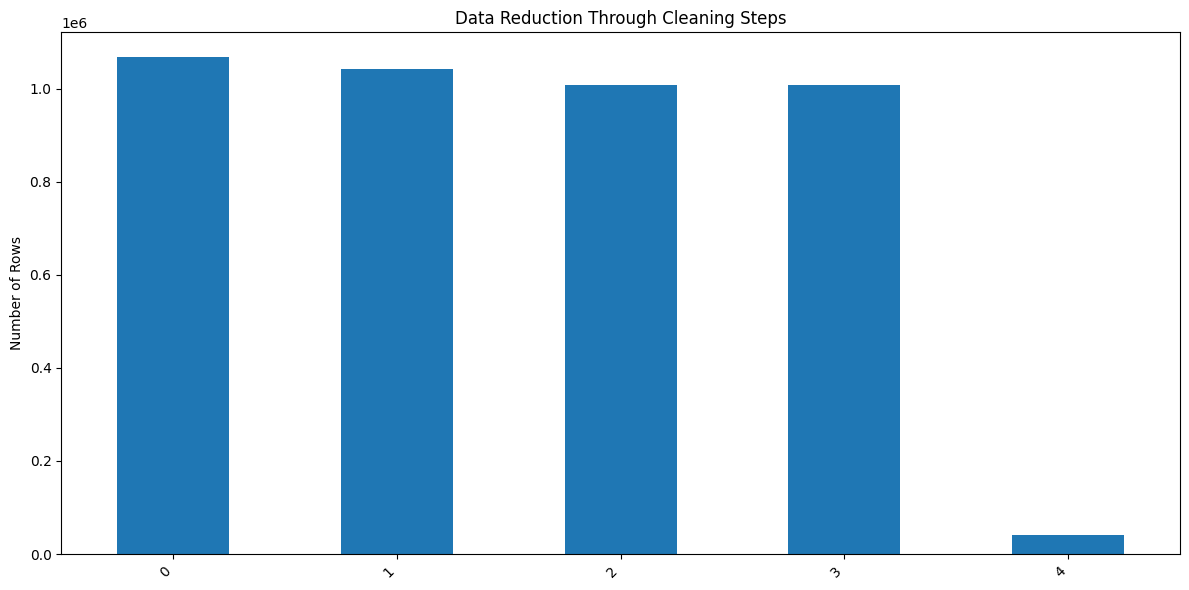

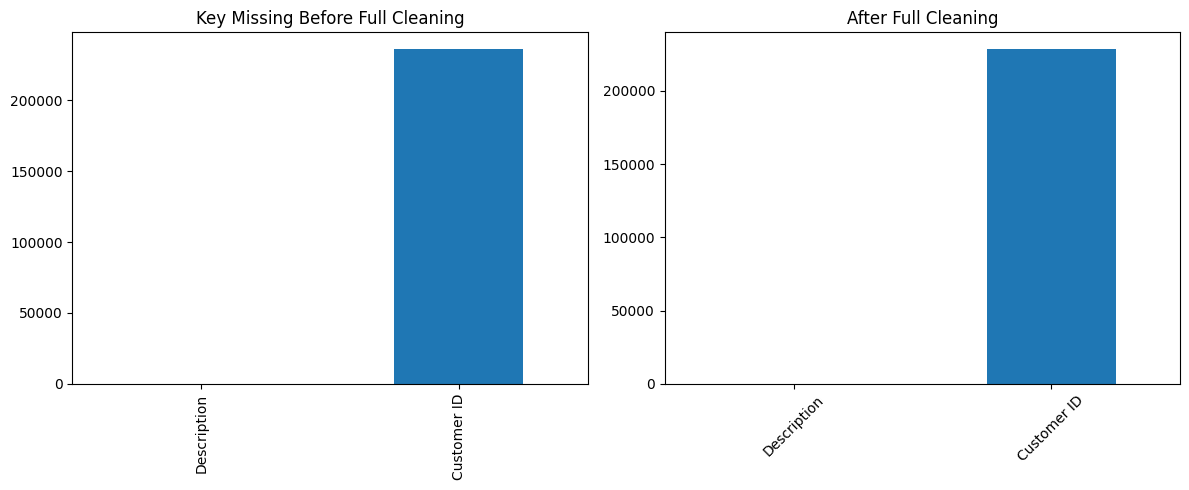

In [9]:
# Dynamic summary (track shapes from your runs: original=1,067,371; post-Cell2=1,041,670; post-Cell3=1,007,913; final line-items=1,007,913)
original_rows = 1067371
post_cancellations = 1041670
post_duplicates = 1007913  # From Cell 3 (1,041,670 - 33,757)
final_line_items = df.shape[0]  # Should match post_duplicates
final_baskets = basket_sets.shape[0]

summary = pd.DataFrame({
    'Step': ['Original Line-Items', 'After Cancellations/Negatives', 'After Missing/Duplicates', 'Final Cleaned Line-Items', 'Aggregated Baskets (Invoices)'],
    'Rows': [original_rows, post_cancellations, post_duplicates, final_line_items, final_baskets],
    'Unique Items': [None, None, None, len(df['Description'].unique()), basket_sets.shape[1]],
    'Notes': ['Raw data', '-2.4% (cancellations)', '-3.2% (duplicates)', 'Ready for mining', 'Binary matrix ready']
})
print("Full Cleaning & Preprocessing Summary:")
print(summary)

# Viz: Row reduction bar plot
steps = summary['Step'].str[:20]  # Truncate for labels
summary['Rows'].plot(kind='bar', x='Step', figsize=(12, 6), legend=False)
plt.title('Data Reduction Through Cleaning Steps')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Missing values evolution (before/after full process)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Before (from Cell 1: approx Description=0 in your variant, but Customer ID ~243k; adjust if exact)
before_missing = pd.Series({'Description': 0, 'Customer ID': 236121}, index=['Description', 'Customer ID'])  # Post-Cell3
before_missing.plot(kind='bar', ax=axes[0], title='Key Missing Before Full Cleaning')
pd.Series({'Description': 0, 'Customer ID': df['Customer ID'].isnull().sum()}).plot(kind='bar', ax=axes[1], title='After Full Cleaning')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Screenshot: Summary table, reduction plot, and missing bars (core for report: "Reduced 95% to focus on baskets")


Running Apriori... (may take 1-3 mins)
Frequent itemsets found: 1086
Strong rules generated: 186

Top Association Rules (Support, Confidence, Lift):
                         antecedents                      consequents  \
10  (72 sweetheart fairy cake cases)    (60 teatime fairy cake cases)   
12  (pack of 60 dinosaur cake cases)    (60 teatime fairy cake cases)   
45      (alarm clock bakelike ivory)     (alarm clock bakelike green)   
47       (alarm clock bakelike pink)     (alarm clock bakelike green)   
48      (alarm clock bakelike green)       (alarm clock bakelike red)   
49        (alarm clock bakelike red)     (alarm clock bakelike green)   
51      (alarm clock bakelike ivory)       (alarm clock bakelike red)   
52     (alarm clock bakelike orange)       (alarm clock bakelike red)   
55       (alarm clock bakelike pink)       (alarm clock bakelike red)   
56    (painted metal pears assorted)  (assorted colour bird ornament)   

     support  confidence       lift  
10  0.018

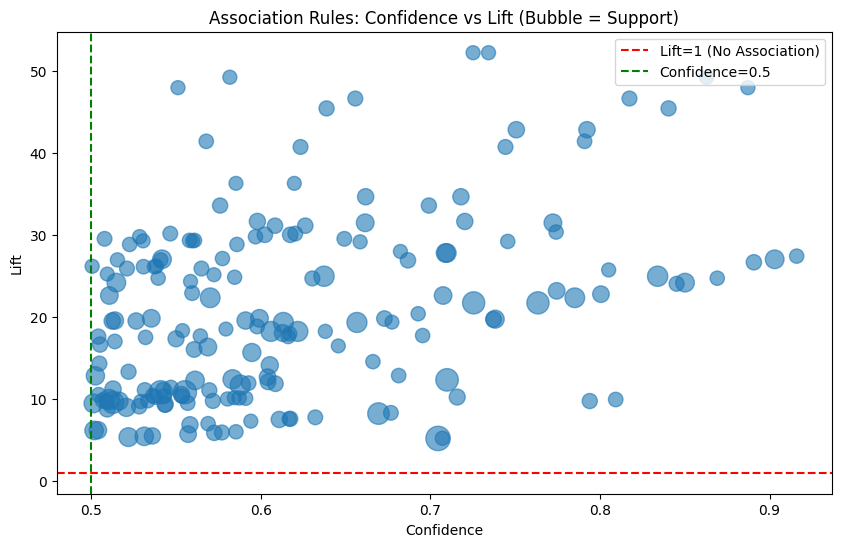

In [12]:
# Install if needed: !pip install mlxtend  (run separately first)

from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')  # Suppress minor warnings

# Find frequent itemsets (min_support=0.01: items in ≥1% baskets; adjust lower for more rules)
print("Running Apriori... (may take 1-3 mins)")
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True, low_memory=True)

# Generate rules (lift >1.2: positive associations; confidence >0.5: reliable)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
rules = rules[rules['confidence'] > 0.5]  # Filter strong rules

print(f"Frequent itemsets found: {len(frequent_itemsets)}")
print(f"Strong rules generated: {len(rules)}")

# Display top 10 rules (sorted by lift)
top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)
print("\nTop Association Rules (Support, Confidence, Lift):")
print(top_rules)

# Optional: Save rules and viz
rules.to_csv('association_rules.csv', index=False)
print("\nRules saved to: association_rules.csv")

# Viz: Scatter plot of rules (confidence vs lift)
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.6, s=rules['support']*10000)  # Bubble size by support
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules: Confidence vs Lift (Bubble = Support)')
plt.axhline(y=1, color='r', linestyle='--', label='Lift=1 (No Association)')
plt.axvline(x=0.5, color='g', linestyle='--', label='Confidence=0.5')
plt.legend()
plt.show()

# Screenshot: Top rules table, scatter plot (deliverable: "E.g., {item1} → {item2} (lift=2.1, conf=0.6)")